# Introducción a scikit-learn

# 1. Carga de datos

In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
import numpy as np

datasetName = 'toyExampleMissing.data'
datasetDelimiter = ','

# load the CSV file as a numpy matrix
dataset = np.loadtxt(datasetName, delimiter=datasetDelimiter)
print dataset.shape

# separate the data from the target attributes
xRaw = dataset[:,0:dataset.shape[1]-1]
y = dataset[:,dataset.shape[1]-1]
print "xRaw, y", xRaw, y
print "mean, std", xRaw.mean(axis=0), xRaw.std(axis=0)


# missing values
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
xPrep = imp.fit_transform(xRaw)
print "Eliminate missing values: mean, std", xPrep.mean(axis=0), xPrep.std(axis=0)


#Standardize data
scaler = preprocessing.StandardScaler().fit(xPrep)
x=scaler.transform(xPrep)
print "Data after x standardizing", x
print "mean, std", scaler.mean_, scaler.scale_




(10, 3)
xRaw, y [[ -1.   5.]
 [ -2.   3.]
 [ -1.   0.]
 [ -1.  -2.]
 [ -3.  -4.]
 [  1.  nan]
 [  2.   3.]
 [  1.   0.]
 [  1.  -2.]
 [  3.  -4.]] [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]
mean, std [  0.  nan] [ 1.78885438         nan]
Eliminate missing values: mean, std [ 0.         -0.11111111] [ 1.78885438  2.87904305]
Data after x standardizing [[ -5.59016994e-01   1.77528124e+00]
 [ -1.11803399e+00   1.08060597e+00]
 [ -5.59016994e-01   3.85930704e-02]
 [ -5.59016994e-01  -6.56082197e-01]
 [ -1.67705098e+00  -1.35075746e+00]
 [  5.59016994e-01  -9.64055595e-18]
 [  1.11803399e+00   1.08060597e+00]
 [  5.59016994e-01   3.85930704e-02]
 [  5.59016994e-01  -6.56082197e-01]
 [  1.67705098e+00  -1.35075746e+00]]
mean, std [ 0.         -0.11111111] [ 1.78885438  2.87904305]


# 2. Operaciones básicas con matrices

In [2]:
# add new data
a = np.array ([1, 1, 2, 3])
b = np.array ([0, 1, -3, 7])
c = np.vstack((a, b))

print c

# select part of the columns
d = c[:,[1, 3]]
print d


[[ 1  1  2  3]
 [ 0  1 -3  7]]
[[1 3]
 [1 7]]


# 3. Representación gráfica

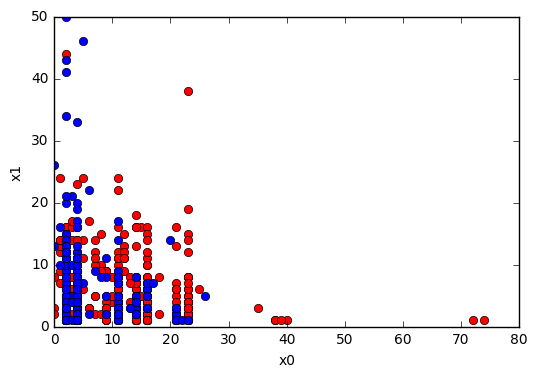

(-0.18274546808203893, 4.8516418731606604e-07)


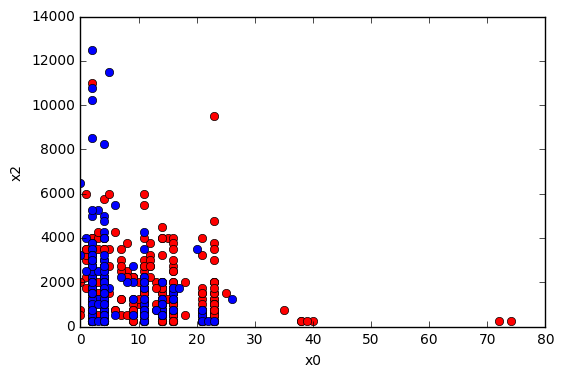

(-0.18274546808203901, 4.8516418731606604e-07)


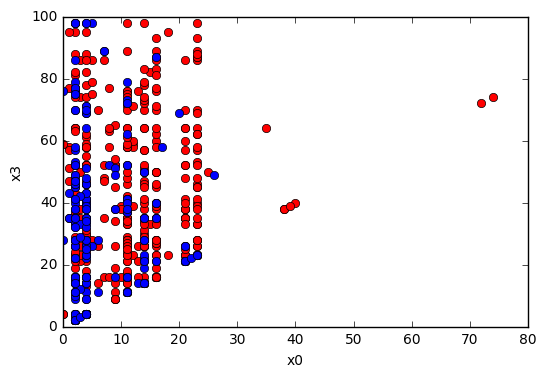

(0.16061809417518483, 1.0139260049235406e-05)


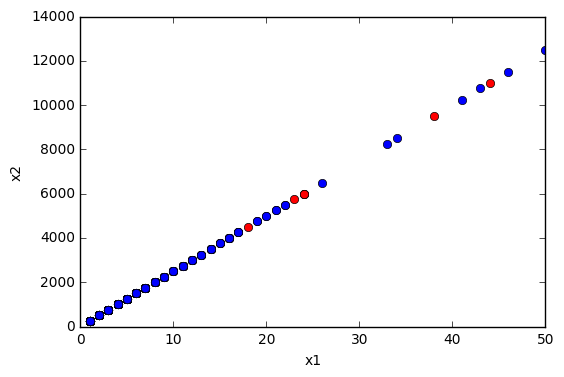

(1.0, 0.0)


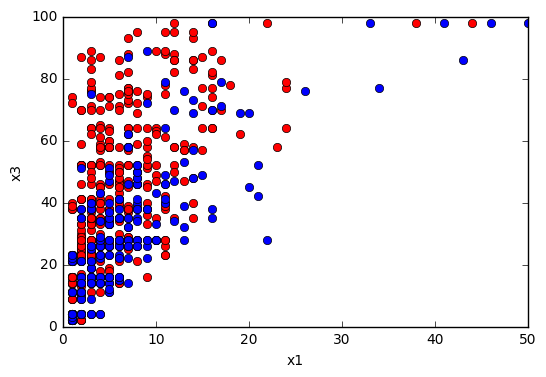

(0.63494027032292832, 1.1475915359242141e-85)


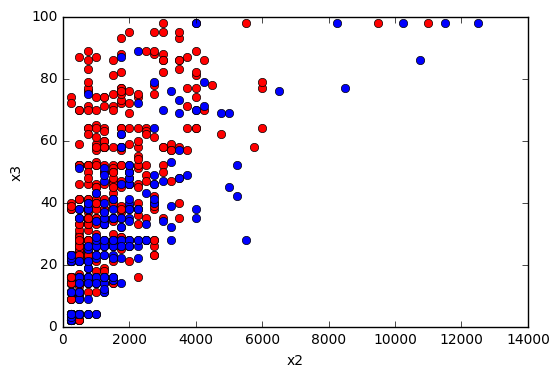

(0.63494027032292832, 1.1475915359242141e-85)


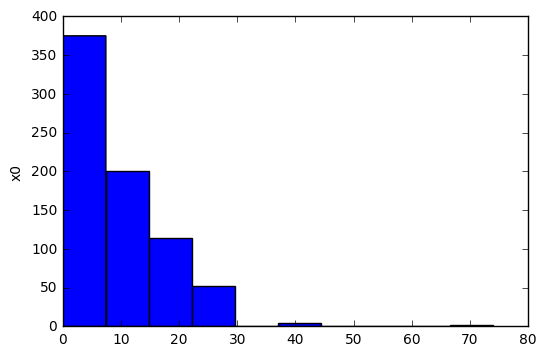

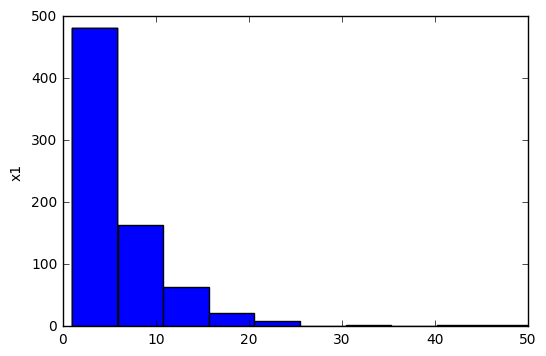

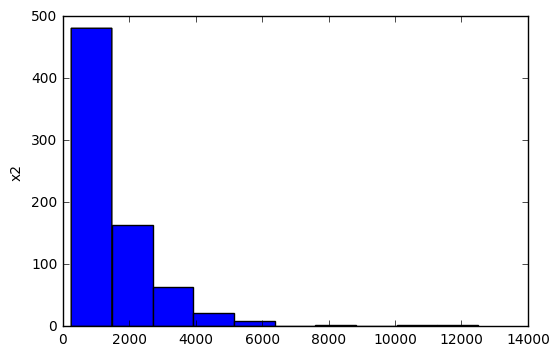

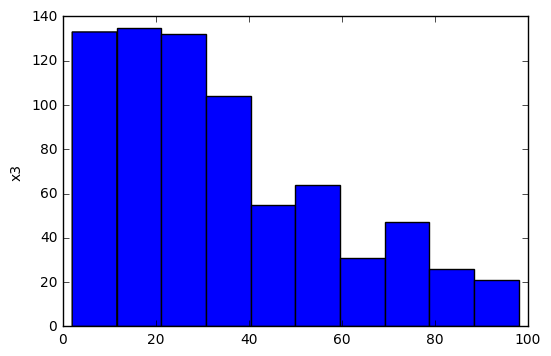

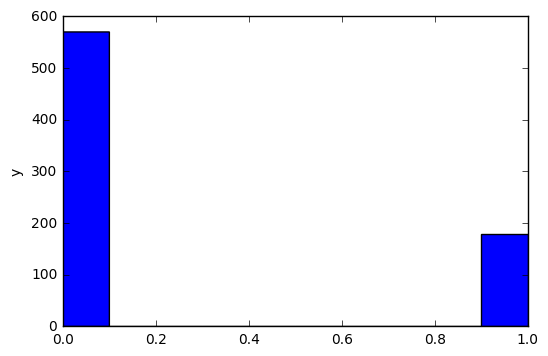

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

datasetName = 'bloodTransfusion.data'
datasetDelimiter = ','

# load the CSV file as a numpy matrix
dataset = np.loadtxt(datasetName, delimiter=datasetDelimiter)

# separate the data from the target attributes
xx = dataset[:,0:dataset.shape[1]-1]
y = dataset[:,dataset.shape[1]-1]


xC0=np.empty([0,xx.shape[1]])
xC1=np.empty([0,xx.shape[1]])

for i in range(xx.shape[0]):
    if y[i] == 0:
        xC0=np.vstack((xC0, xx[i,:]))
    elif y[i] == 1:
        xC1=np.vstack((xC1, xx[i,:]))      
    
for i in range(xx.shape[1]):
    for j in range(i+1, xx.shape[1]):
        plt.plot(xC0[:,i], xC0[:,j],'ro', xC1[:,i], xC1[:,j],'bo')
        plt.xlabel('x'+str(i))
        plt.ylabel('x'+str(j))
        plt.show()
        #correlation
        print stats.pearsonr(xx[:,i], xx[:,j])
        
for i in range(0, xx.shape[1]):
    plt.hist(xx[:,i])
    plt.ylabel('x'+str(i))
    plt.show()
plt.hist(y)
plt.ylabel('y')
plt.show()